<a href="https://colab.research.google.com/github/Arpine-Amirkhanyan/ML_final_project/blob/main/ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Ներմուծենք անհրաժեշտ գրադարանները
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [3]:
# Ներմուծենք .arff ֆայլը
data1 = arff.loadarff('bone-marrow.arff')
data = pd.DataFrame(data1[0])

data.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,b'1',b'1',22.830137,b'0',b'1',b'0',b'1',b'1',b'1',b'0',...,b'1',7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,b'1',b'0',23.342466,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,b'1',b'0',26.394521,b'0',b'1',b'0',b'-1',b'-1',b'1',b'0',...,b'1',7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,b'0',b'0',39.684932,b'1',b'1',b'0',b'1',b'2',b'1',b'1',...,b'?',4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,b'0',b'1',33.358904,b'0',b'0',b'0',b'1',b'2',b'0',b'1',...,b'1',51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


# EDA

In [4]:
data.shape

(187, 37)

In [5]:
# Փոխենք Byte string փոփխականների տիպը

data = data.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
data.replace(['-1', '?'], np.nan, inplace=True)
data.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1,1,0,...,1,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,NaN,NaN,1,0,...,1,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,NaN,NaN,1,0,...,1,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,1,2,1,1,...,NaN,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,0,1,33.358904,0,0,0,1,2,0,1,...,1,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    object 
 1   Stemcellsource        187 non-null    object 
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    object 
 4   IIIV                  187 non-null    object 
 5   Gendermatch           187 non-null    object 
 6   DonorABO              159 non-null    object 
 7   RecipientABO          136 non-null    object 
 8   RecipientRh           185 non-null    object 
 9   ABOmatch              186 non-null    object 
 10  CMVstatus             171 non-null    object 
 11  DonorCMV              185 non-null    object 
 12  RecipientCMV          173 non-null    object 
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    object 
 15  Txpostrelapse         1

In [7]:
data.describe()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
count,187.000000,187.000000,187.000000,182.000000,182.000000,185.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,33.472068,9.931551,11.891781,5.385096,4.745714,35.801081,26752.866310,90937.919786,775408.042781,938.743316,0.454545
std,8.271826,5.305639,9.914386,9.598716,3.859128,19.650922,161747.200525,288242.407688,418425.252689,849.589495,0.499266
min,18.646575,0.600000,0.790000,0.204132,0.040000,6.000000,9.000000,9.000000,10.000000,6.000000,0.000000
25%,27.039726,5.050000,5.350000,1.786683,1.687500,19.000000,13.000000,16.000000,1000000.000000,168.500000,0.000000
50%,33.550685,9.600000,9.720000,2.734462,4.325000,33.000000,15.000000,21.000000,1000000.000000,676.000000,0.000000
75%,40.117809,14.050000,15.415000,5.823565,6.785000,50.600000,17.000000,37.000000,1000000.000000,1604.000000,1.000000
max,55.553425,20.200000,57.780000,99.560970,20.020000,103.400000,1000000.000000,1000000.000000,1000000.000000,3364.000000,1.000000


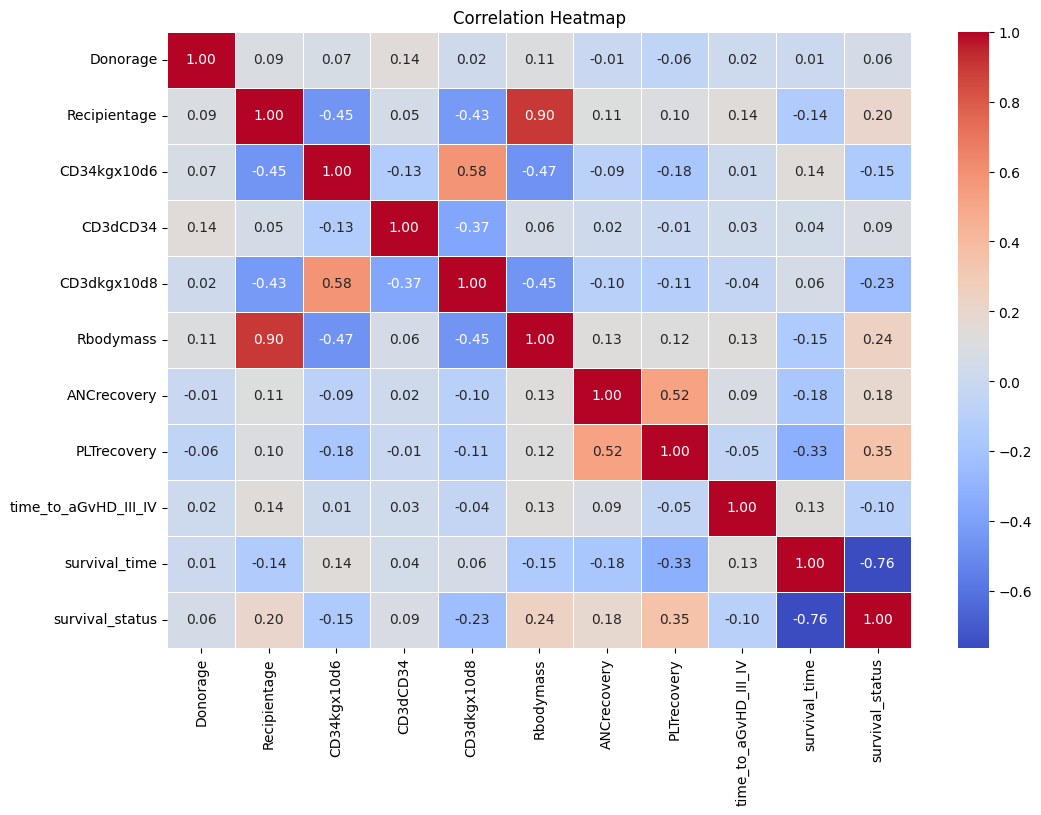

In [10]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('survival_status')
corr = data[numeric_cols.to_list() + ['survival_status']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

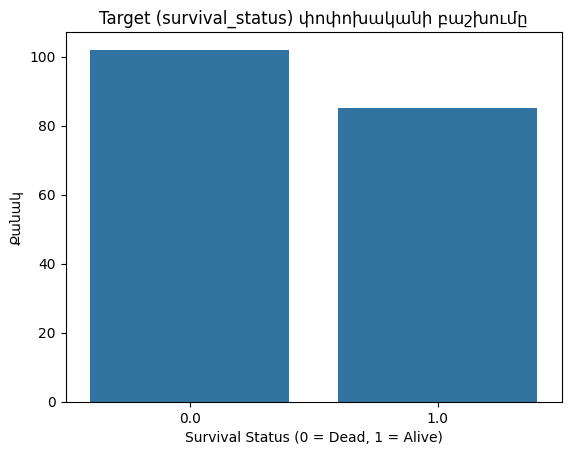

In [11]:
sns.countplot(data=data, x='survival_status')
plt.title('Target (survival_status) փոփոխականի բաշխումը')
plt.xlabel('Survival Status (0 = Dead, 1 = Alive)')
plt.ylabel('Քանակ')
plt.show()

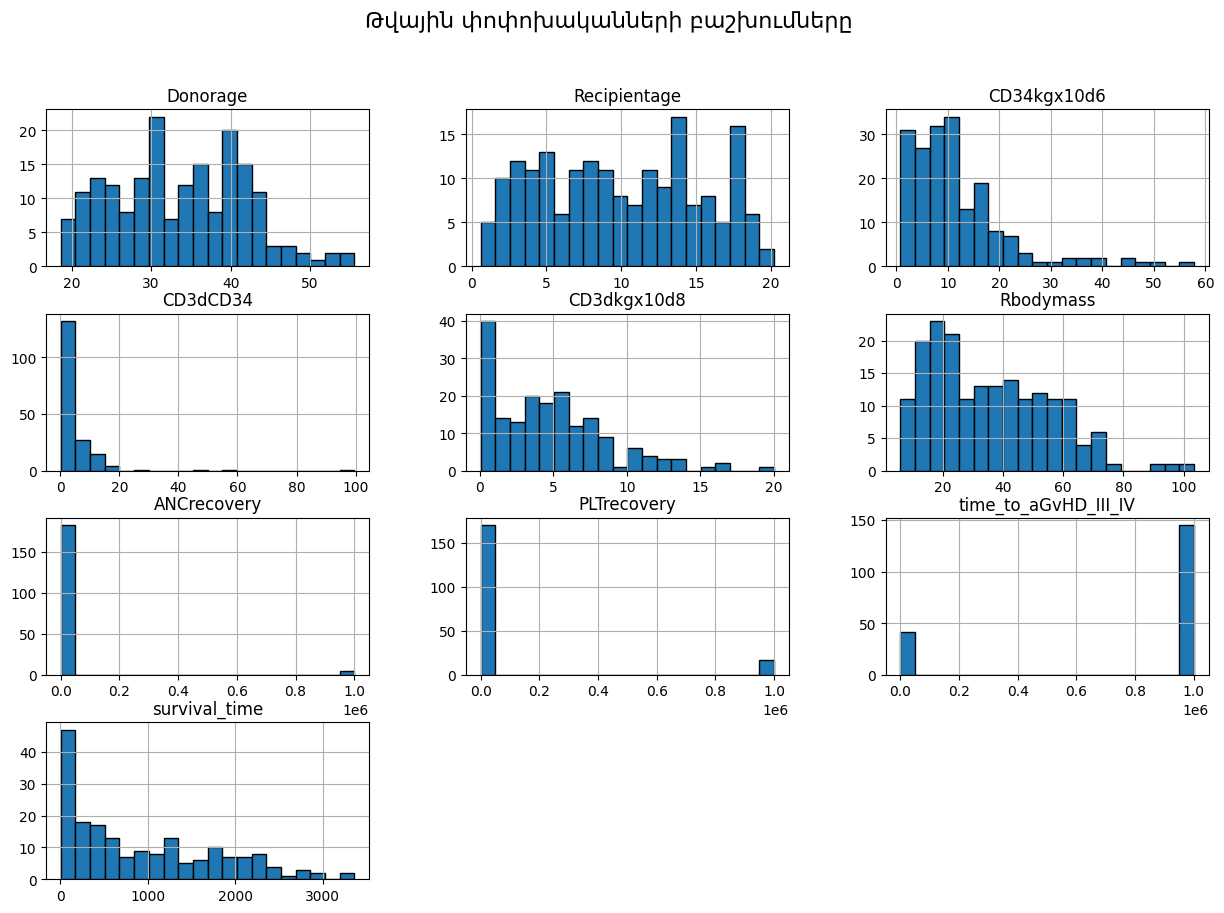

In [12]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('survival_status')

data[numeric_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Թվային փոփոխականների բաշխումները", fontsize=16)
plt.show()

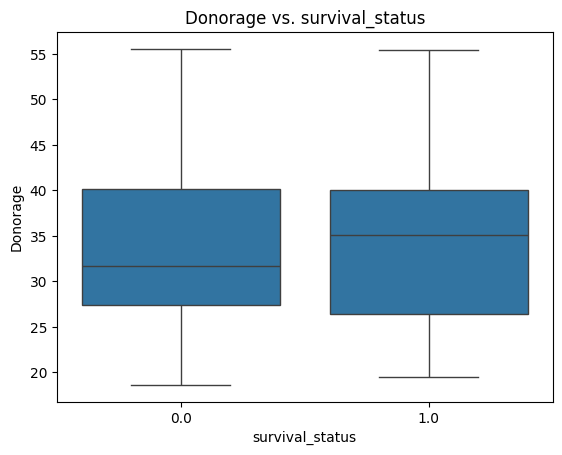

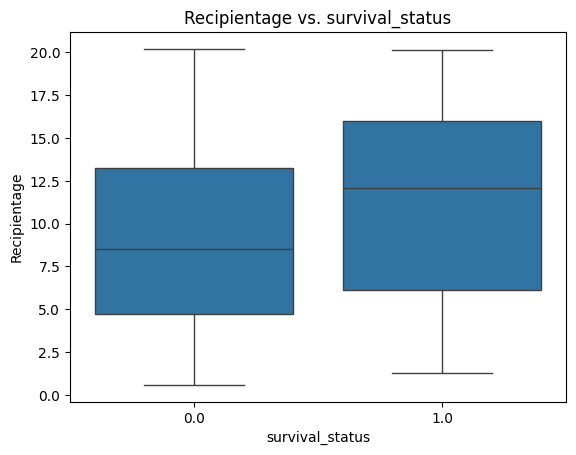

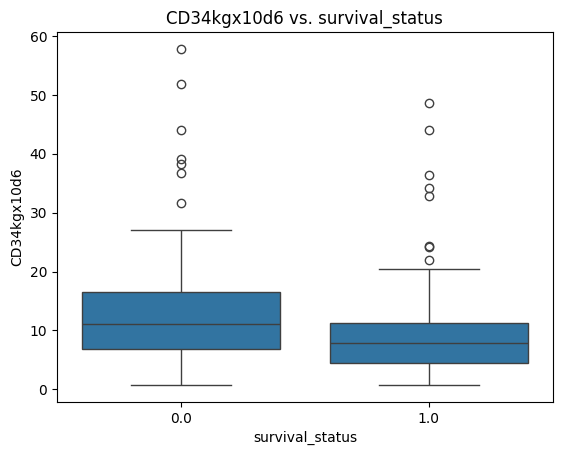

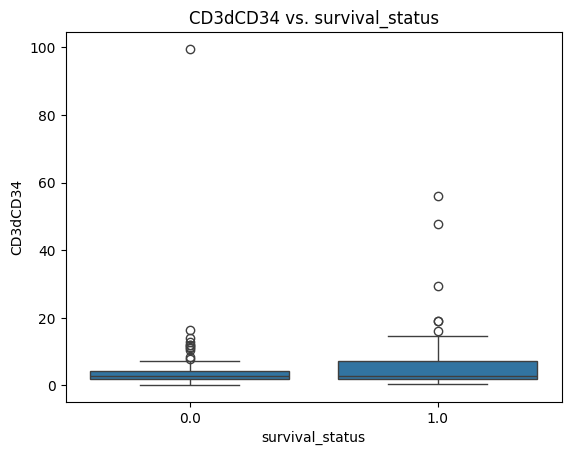

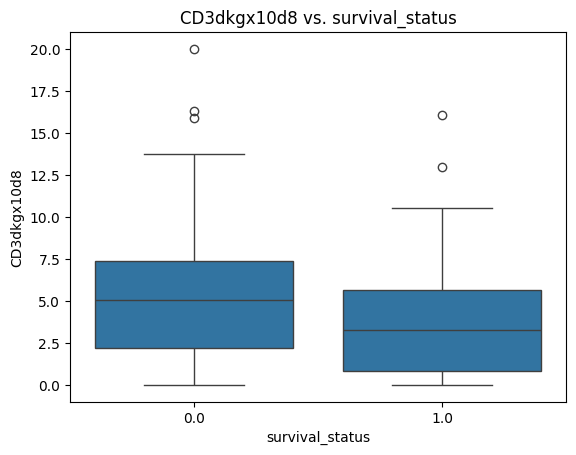

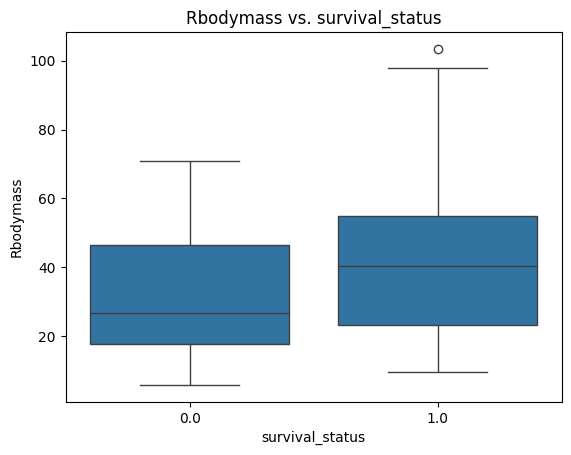

In [13]:
for col in ['Donorage', 'Recipientage', 'CD34kgx10d6', 'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass']:
    sns.boxplot(data=data, x='survival_status', y=col)
    plt.title(f'{col} vs. survival_status')
    plt.show()

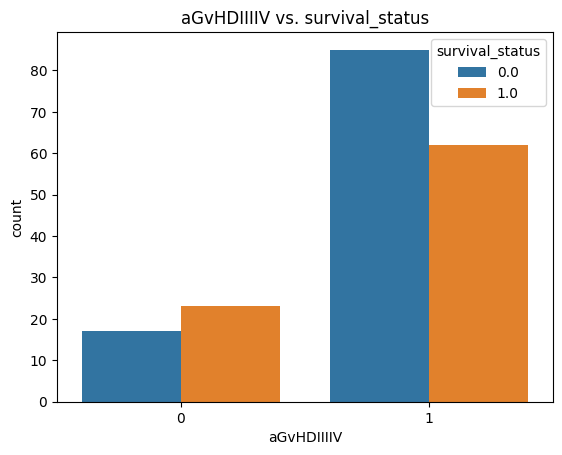

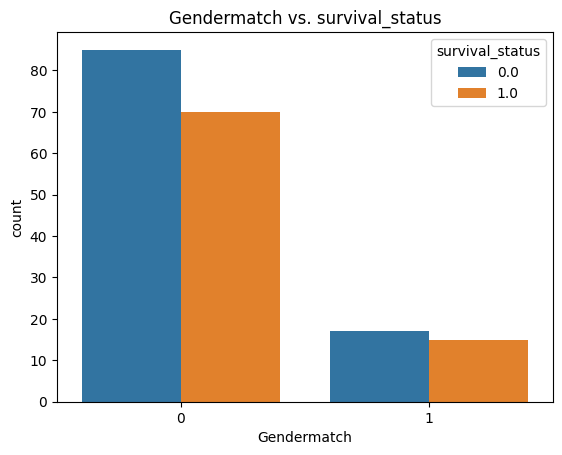

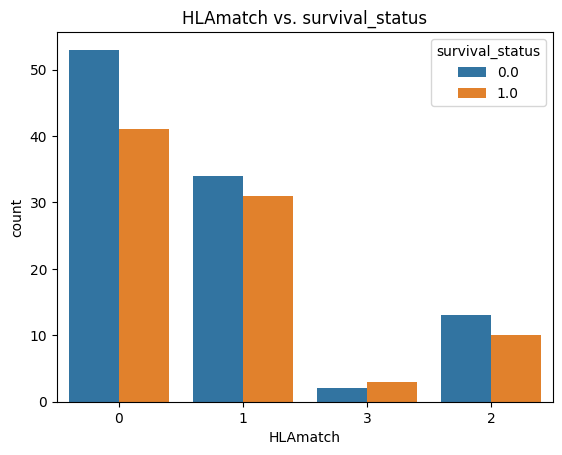

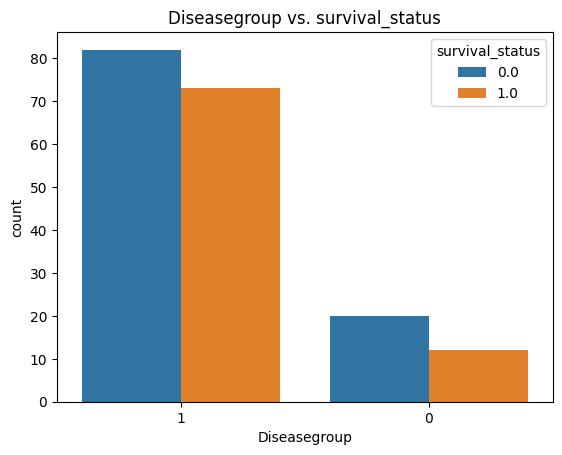

In [14]:
binary_cols = ['aGvHDIIIIV', 'Gendermatch', 'HLAmatch', 'Diseasegroup']

for col in binary_cols:
    sns.countplot(data=data, x=col, hue='survival_status')
    plt.title(f'{col} vs. survival_status')
    plt.show()

# Data preprocessing

In [15]:
# Ընտրենք մեզ հետաքրքրող սյուները
selected_features = [
    'Recipientage', 'Donorage', 'CD34kgx10d6', 'CD3dkgx10d8',
    'aGvHDIIIIV', 'ANCrecovery', 'Gendermatch', 'PLTrecovery',
    'HLAmatch', 'Diseasegroup', 'Relapse', 'Txpostrelapse', 'Rbodymass',
    'Stemcellsource', 'survival_status'
]

df = data[selected_features]

# Կատեգորիկ տվյալների ձևափոխություն
df = pd.get_dummies(df, columns=['HLAmatch'], prefix='HLAmatch')

df.head()

,Recipientage,Donorage,CD34kgx10d6,CD3dkgx10d8,aGvHDIIIIV,ANCrecovery,Gendermatch,PLTrecovery,Diseasegroup,Relapse,Txpostrelapse,Rbodymass,Stemcellsource,survival_status,HLAmatch_0,HLAmatch_1,HLAmatch_2,HLAmatch_3
0,9.6,22.830137,7.20,5.38,0,19.0,0,51.0,1,0,0,35.0,1,0.0,True,False,False,False
1,4.0,23.342466,4.50,0.41,1,16.0,0,37.0,1,1,0,20.6,0,1.0,True,False,False,False
2,6.6,26.394521,7.94,0.42,1,23.0,0,20.0,1,1,0,23.4,0,1.0,True,False,False,False
3,18.1,39.684932,4.25,0.14,0,23.0,0,29.0,1,0,0,50.0,0,1.0,True,False,False,False
4,1.3,33.358904,51.85,13.05,1,14.0,0,14.0,1,0,0,9.0,1,0.0,False,True,False,False


In [16]:
# Ստուգենք բացակայող տվյալների առկայությունը
df.isna().sum()

,0
Recipientage,0
Donorage,0
CD34kgx10d6,0
CD3dkgx10d8,5
aGvHDIIIIV,0
ANCrecovery,0
Gendermatch,0
PLTrecovery,0
Diseasegroup,0
Relapse,0


In [17]:
# 'CD3dkgx10d8' և 'Rbodymass' սյուների բացակայող տվյալները լրացնենք մեդիանով
df['CD3dkgx10d8'] = df['CD3dkgx10d8'].fillna(df['CD3dkgx10d8'].median())
df['Rbodymass'] = df['Rbodymass'].fillna(df['Rbodymass'].median())

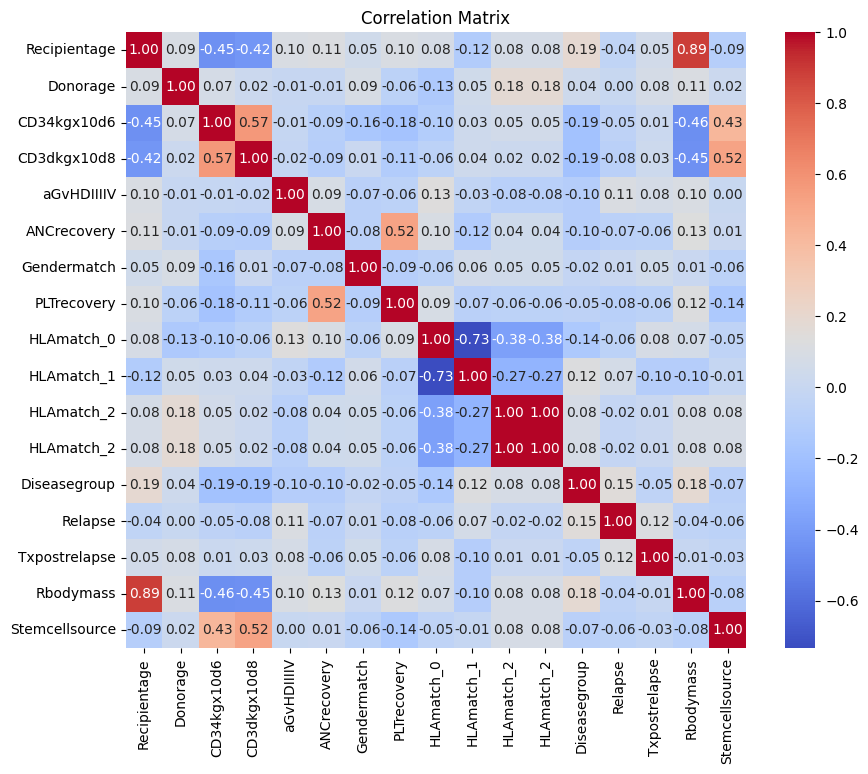

In [18]:
# Համոզվենք, որ ընտրված feature-ները կոռելացված չեն
selected_features = [
       'Recipientage', 'Donorage', 'CD34kgx10d6', 'CD3dkgx10d8', 'aGvHDIIIIV',
       'ANCrecovery', 'Gendermatch', 'PLTrecovery', 'HLAmatch_0', 'HLAmatch_1',
       'HLAmatch_2', 'HLAmatch_2', 'Diseasegroup', 'Relapse', 'Txpostrelapse',
       'Rbodymass', 'Stemcellsource',
]

corr_matrix_full = df[selected_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Լոգիստիկ մոդել

In [19]:
X = df.drop(columns='survival_status')
y = df['survival_status']

# Train-test բաժանում
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Լոգիստիկ ռեգրեսիոն մոդել
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Կանխատեսումներ
y_pred = model.predict(X_test)

In [20]:
# Confusion մատրից
print(confusion_matrix(y_test, y_pred))

[[21  5]
 [ 7 14]]


In [21]:
# Մետրիկաներ
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        26
         1.0       0.74      0.67      0.70        21

    accuracy                           0.74        47
   macro avg       0.74      0.74      0.74        47
weighted avg       0.74      0.74      0.74        47



##  Կատարենք 5-fold cross-validation

In [22]:
X = df.drop(columns=['survival_status'])
y = df['survival_status']

# Pipeline լոգիստիկ ռեգրեսիայով և scaling-ով
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
)

# 5-fold cross-validation (օգտագործելով F1)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')

print("Cross-validated F1-scores:", scores)
print("Mean F1-score:", np.mean(scores))

Cross-validated F1-scores: [0.8        0.64705882 0.73333333 0.62857143 0.66666667]
Mean F1-score: 0.6951260504201681


## Tuning

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000),
                    param_grid, scoring='f1', cv=5)
grid.fit(X, y)

print("Best params:", grid.best_params_)
print("Best F1-score:", grid.best_score_)

Best params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1-score: 0.7069117647058824


# Random Forest

In [24]:
# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

# 5-fold cross-validation (օգտագործելով F1)
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='f1')

print("Random Forest cross-validated F1-scores:", rf_scores)
print("Random Forest mean F1-score:", np.mean(rf_scores))


Random Forest cross-validated F1-scores: [0.74074074 0.70967742 0.70967742 0.72727273 0.62068966]
Random Forest mean F1-score: 0.701611592379112


# Gradient Boosting


In [25]:
from sklearn.ensemble import HistGradientBoostingClassifier


# Gradient Boosting
gb_model = HistGradientBoostingClassifier(
    max_iter=100,
    class_weight='balanced',
    random_state=42
)

# 5-fold cross-validation (օգտագործելով F1)
gb_scores = cross_val_score(gb_model, X, y, cv=5, scoring='f1')

print("Gradient Boosting cross-validated F1-scores:", gb_scores)
print("Gradient Boosting mean F1-score:", np.mean(gb_scores))


Gradient Boosting cross-validated F1-scores: [0.64285714 0.51612903 0.68571429 0.68421053 0.60606061]
Gradient Boosting mean F1-score: 0.6269943186411777
